In [1]:
import os
os.chdir("D:\IIT Kanpur\Time Series Project")
os.getcwd()

'D:\\IIT Kanpur\\Time Series Project'

In [2]:
import pandas as pd
nifty_df = pd.read_excel("Nf50_Data3.xlsx")
nifty_df.head()
isinstance(nifty_df, pd.DataFrame)

True

In [3]:
yt_obs = nifty_df["Close"]
yt_obs

0      10435.55
1      10442.20
2      10443.20
3      10504.80
4      10558.85
         ...   
303    11354.25
304    11483.25
305    11445.05
306    11570.00
307    11623.90
Name: Close, Length: 308, dtype: float64

In [4]:
len(yt_obs)
import numpy as np
x = np.arange(len(yt_obs)) + 1
x
nifty_df['x'] = x
nifty_df.head()
nifty_df.drop(nifty_df.columns[[1,2,3]],axis = 1, inplace=True)
nifty_df.head()

,Time,Close,x
0,2018-01-01,10435.55,1
1,2018-01-02,10442.20,2
2,2018-01-03,10443.20,3
3,2018-01-04,10504.80,4
4,2018-01-05,10558.85,5


In [5]:
nifty_time = nifty_df.set_index("Time")
nifty_time

,Close,x
Time,,
2018-01-01,10435.55,1
2018-01-02,10442.20,2
2018-01-03,10443.20,3
2018-01-04,10504.80,4
2018-01-05,10558.85,5
...,...,...
2019-03-25,11354.25,304
2019-03-26,11483.25,305
2019-03-27,11445.05,306


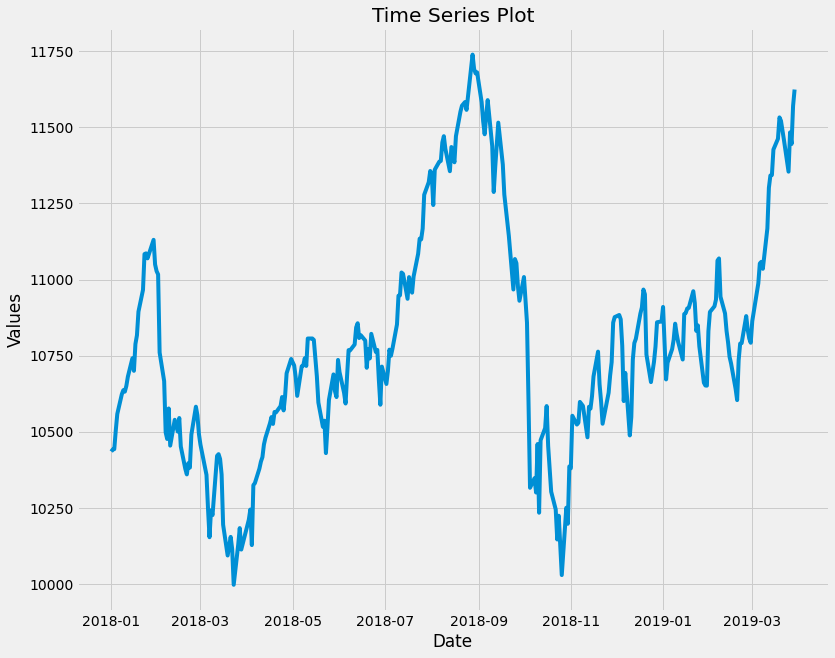

In [6]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series Plot")
 

plt.plot(nifty_time["Close"])

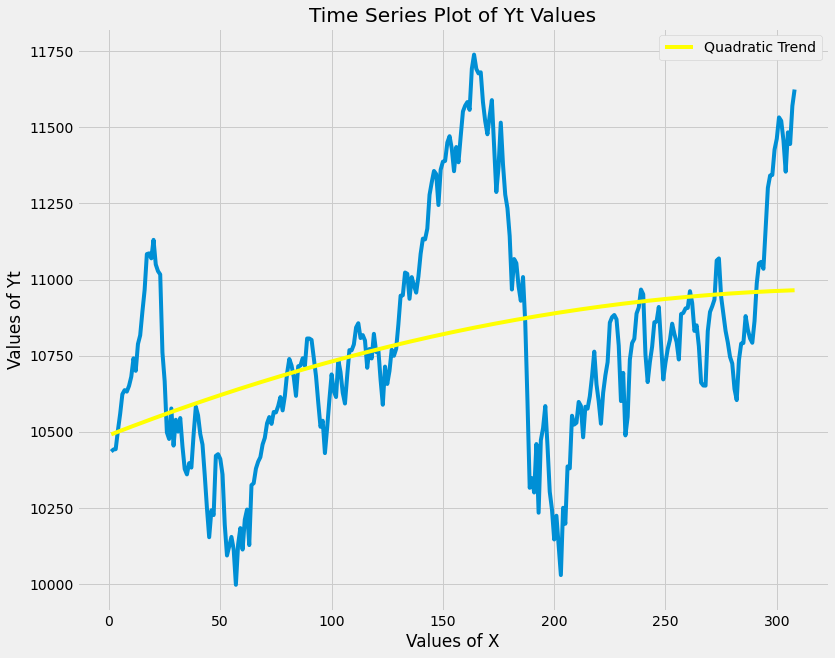

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#lin_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 1))
quad_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 2))
myline = np.linspace(1, 308, 450)



# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Values of X")
plt.ylabel("Values of Yt")
plt.title("Time Series Plot of Yt Values")

plt.plot(nifty_df['x'],nifty_df['Close'])

#plt.plot(myline, lin_trend(myline), color = 'red', label = 'Linear Trend')

plt.plot(myline, quad_trend(myline), color = 'yellow', label = 'Quadratic Trend')

plt.legend(framealpha=1, frameon=True)

plt.show()

#quad_trend(5)

In [8]:
import pandas as pd 
#np.polyfit(nifty_df["x"],nifty_df["High Points"],2)
T_t = quad_trend(x)
detrended_value = yt_obs/T_t
detrended_value

list_of_tuple = list(zip(nifty_df['Time'],x,yt_obs, T_t,detrended_value))
df1 = pd.DataFrame(list_of_tuple, columns=["Time","x","yt_obs", "T_t","detrended_value"])
df1.head()

,Time,x,yt_obs,T_t,detrended_value
0,2018-01-01,1,10435.55,10491.947149,0.994625
1,2018-01-02,2,10442.20,10494.776642,0.994990
2,2018-01-03,3,10443.20,10497.597711,0.994818
3,2018-01-04,4,10504.80,10500.410357,1.000418
4,2018-01-05,5,10558.85,10503.214580,1.005297


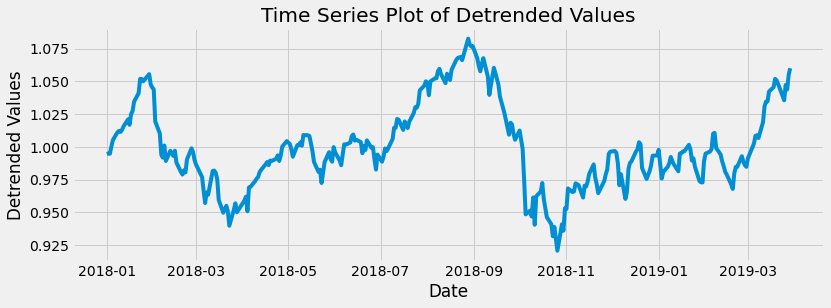

In [9]:
df1_time_index = df1.set_index("Time")
df1_time_index.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Detrended Values")
plt.title("Time Series Plot of Detrended Values")
 

plt.plot(df1_time_index["detrended_value"])

In [10]:
df1['month'] = pd.DatetimeIndex(df1['Time']).month

unadjusted_si = df1.groupby(by="month")["detrended_value"].mean()
unadjusted_si
adjusted_si = unadjusted_si*(12/sum(unadjusted_si))
sum(adjusted_si)
adjusted_si

month
1     1.004976
2     0.991968
3     0.997380
4     0.981124
5     0.994773
6     0.998141
7     1.017542
8     1.061109
9     1.039851
10    0.953612
11    0.973426
12    0.986096
Name: detrended_value, dtype: float64

In [11]:
seasonal_indices = []
for j in range(len(df1["month"])):
    seasonal_indices.append(adjusted_si[df1["month"][j]]) 
df1["seasonal_indices"] = seasonal_indices
df1.head()

deseasonalized_values = detrended_value/seasonal_indices
print(deseasonalized_values)

0      0.989700
1      0.990063
2      0.989892
3      0.995464
4      1.000319
         ...   
303    1.038324
304    1.050094
305    1.046575
306    1.057976
307    1.062880
Name: Close, Length: 308, dtype: float64


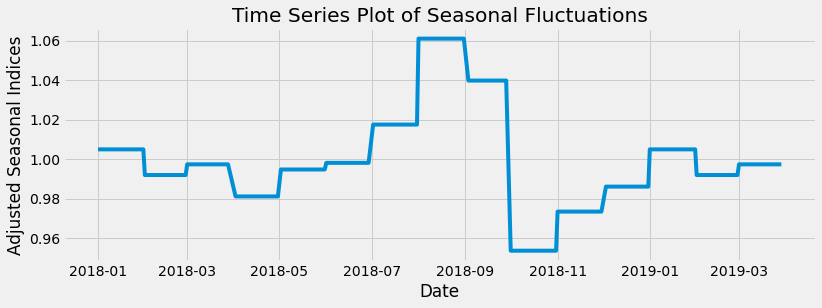

In [12]:
df1_after_seasonal = df1.set_index("Time")
df1_after_seasonal.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title

plt.xlabel("Date")
plt.ylabel("Adjusted Seasonal Indices")
plt.title("Time Series Plot of Seasonal Fluctuations")
 

plt.plot(df1_after_seasonal["seasonal_indices"])

In [13]:
df1["deseasonalized_values"] = deseasonalized_values
df1.head()
#print(deseasonalized_values)

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values
0,2018-01-01,1,10435.55,10491.947149,0.994625,1,1.004976,0.989700
1,2018-01-02,2,10442.20,10494.776642,0.994990,1,1.004976,0.990063
2,2018-01-03,3,10443.20,10497.597711,0.994818,1,1.004976,0.989892
3,2018-01-04,4,10504.80,10500.410357,1.000418,1,1.004976,0.995464
4,2018-01-05,5,10558.85,10503.214580,1.005297,1,1.004976,1.000319


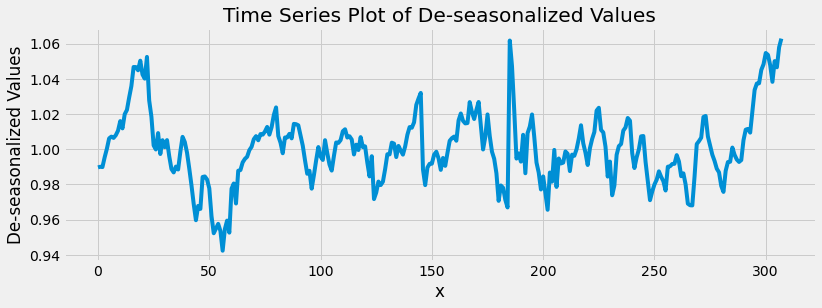

In [14]:
df1_deseasonal = df1.set_index("Time")
df1_deseasonal.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title
plt.xlabel("x")
plt.ylabel("De-seasonalized Values")
plt.title("Time Series Plot of De-seasonalized Values")
 

plt.plot(df1["deseasonalized_values"])

126.0

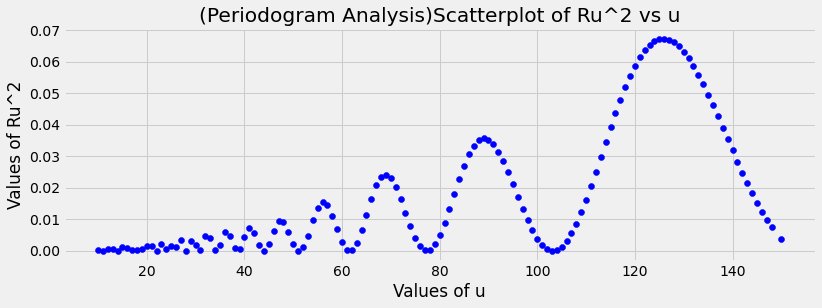

In [15]:
import math
ut = yt_obs/(T_t*seasonal_indices)
df1["ut"] = ut
df1.head()

u = np.floor(np.linspace(10,150,140))
u
A = []
B = []
for i in range(len(u)):
    A.append((2/len(ut))*sum(ut*np.cos((2*math.pi*x)/u[i])))
    B.append((2/len(ut))*sum(ut*np.sin((2*math.pi*x)/u[i])))
Ru_2 = np.square(A) + np.square(B)
Ru_2

plt.figure(figsize=(12, 4))
plt.xlabel("Values of u")
plt.ylabel("Values of Ru^2")
plt.title("(Periodogram Analysis)Scatterplot of Ru^2 vs u")

plt.scatter(u, Ru_2, c = "blue")

lamda = u[pd.Series(Ru_2).idxmax()]
lamda

216.0

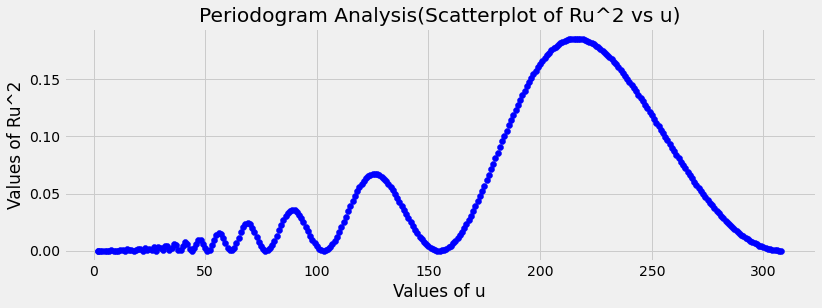

In [16]:
u_temp = np.floor(np.linspace(2,308,308))
u_temp
A = []
B = []
for i in range(len(u_temp)):
    A.append((2/len(ut))*sum(ut*np.cos((2*math.pi*x)/u_temp[i])))
    B.append((2/len(ut))*sum(ut*np.sin((2*math.pi*x)/u_temp[i])))
    
Ru_2 = np.square(A) + np.square(B)
Ru_2


plt.figure(figsize=(12, 4))
plt.xlabel("Values of u")
plt.ylabel("Values of Ru^2")
plt.title("Periodogram Analysis(Scatterplot of Ru^2 vs u)")
plt.scatter(u_temp, Ru_2, c = "blue")

lamda = u_temp[pd.Series(Ru_2).idxmax()]
lamda


In [17]:
float_array = (np.floor(np.linspace(2,150,150)))
float_array

Ru_2_new = Ru_2[float_array.astype(int)]

lamda_2nd = u_temp[pd.Series(Ru_2_new).idxmax()]
lamda_2nd 

125.0

In [18]:
lamda_geometric_mean = math.sqrt(lamda*lamda_2nd)
lamda_geometric_mean   #consider 164

164.31676725154983

In [19]:
import statistics as st
lamda = 164
#A0 = st.mean(ut)
#A_hat = (2/len(ut))*sum(ut*np.cos((2*math.pi*x)/lamda))
#B_hat = (2/len(ut))*sum(ut*np.sin((2*math.pi*x)/lamda))

cos_pred = np.cos((2*math.pi*x)/lamda)
sin_pred = np.sin((2*math.pi*x)/lamda)

df1["cos_pred"] = cos_pred
df1["sin_pred"] = sin_pred


from sklearn import linear_model

X_new = df1[['cos_pred', 'sin_pred']]
y_new = df1['ut']

regr = linear_model.LinearRegression()
regr.fit(X_new, y_new)

A0 = regr.intercept_
A_hat = regr.coef_[0]
B_hat = regr.coef_[1]
ut_hat = A0 + A_hat*cos_pred + B_hat*sin_pred
df1["ut_hat"] = ut_hat
df1.head()

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat
0,2018-01-01,1,10435.55,10491.947149,0.994625,1,1.004976,0.989700,0.989700,0.999266,0.038303,1.010983
1,2018-01-02,2,10442.20,10494.776642,0.994990,1,1.004976,0.990063,0.990063,0.997066,0.076549,1.010794
2,2018-01-03,3,10443.20,10497.597711,0.994818,1,1.004976,0.989892,0.989892,0.993402,0.114683,1.010591
3,2018-01-04,4,10504.80,10500.410357,1.000418,1,1.004976,0.995464,0.995464,0.988280,0.152649,1.010374
4,2018-01-05,5,10558.85,10503.214580,1.005297,1,1.004976,1.000319,1.000319,0.981708,0.190391,1.010144


,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat
0,2018-01-01,1,10435.55,10491.947149,0.994625,1,1.004976,0.989700,0.989700,0.999266,0.038303,1.010983
1,2018-01-02,2,10442.20,10494.776642,0.994990,1,1.004976,0.990063,0.990063,0.997066,0.076549,1.010794
2,2018-01-03,3,10443.20,10497.597711,0.994818,1,1.004976,0.989892,0.989892,0.993402,0.114683,1.010591
3,2018-01-04,4,10504.80,10500.410357,1.000418,1,1.004976,0.995464,0.995464,0.988280,0.152649,1.010374
4,2018-01-05,5,10558.85,10503.214580,1.005297,1,1.004976,1.000319,1.000319,0.981708,0.190391,1.010144


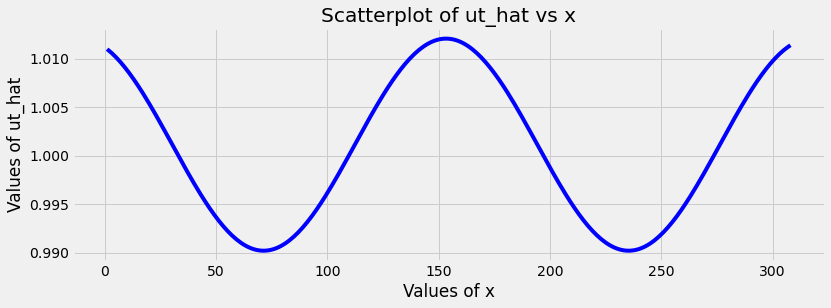

In [20]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of ut_hat")
plt.title("Scatterplot of ut_hat vs x")

plt.plot(x, ut_hat, c = "blue")

df1.head()

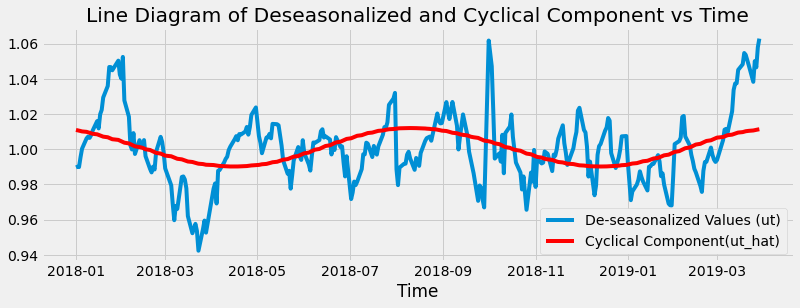

In [21]:
df1_harmonic = df1.set_index("Time")

plt.figure(figsize=(12, 4))
plt.xlabel("Time")
#plt.ylabel("Values of ut_hat")
plt.title("Line Diagram of Deseasonalized and Cyclical Component vs Time")


plt.plot(df1_harmonic["ut"], label = "De-seasonalized Values (ut)")
plt.plot(df1_harmonic["ut_hat"], c = "red", label = "Cyclical Component(ut_hat)")

plt.legend(framealpha=1, frameon=True)

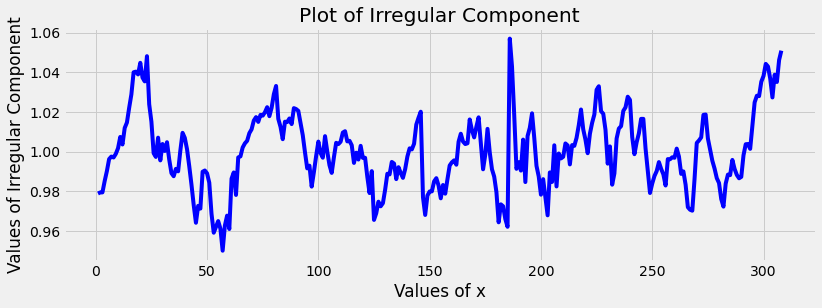

In [22]:
irregular = ut/ut_hat
irregular
df1["irregular"] = irregular
df1.head()
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(x, irregular, c = "blue")

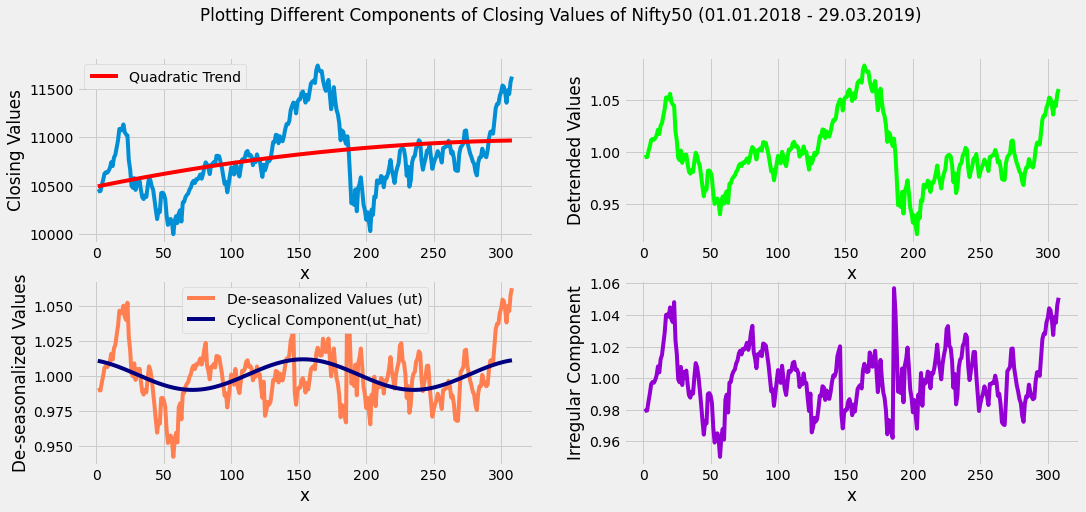

In [24]:
plt.figure(figsize=(16, 7))
plt.subplot(221)
plt.xlabel("x")
plt.ylabel("Closing Values")
#plt.title("Time Series Plot")
plt.plot(x, nifty_time["Close"])
plt.plot(myline, quad_trend(myline), color = 'red', label = 'Quadratic Trend')
plt.legend(framealpha=1, frameon=True)



plt.subplot(222)
plt.xlabel("x")
plt.ylabel("Detrended Values")
#plt.title("Time Series Plot of Detrended Values")
plt.plot(x, df1_time_index["detrended_value"], c = "lime")


plt.subplot(223)
plt.xlabel("x")
plt.ylabel("De-seasonalized Values")
#plt.title("Line Diagram of Deseasonalized and Cyclical Component vs Time")
plt.plot(x,df1_harmonic["ut"], label = "De-seasonalized Values (ut)", c = "coral")
plt.plot(x, df1_harmonic["ut_hat"], c = "navy", label = "Cyclical Component(ut_hat)")
plt.legend(framealpha=1, frameon=True)


plt.subplot(224)
plt.xlabel("x")
plt.ylabel("Irregular Component")
#plt.title("Plot of Irregular Component")
plt.plot(x, irregular, c = "darkviolet")



plt.suptitle("Plotting Different Components of Closing Values of Nifty50 (01.01.2018 - 29.03.2019)")
plt.show()


In [24]:
df1.head()

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2018-01-01,1,10435.55,10491.947149,0.994625,1,1.004976,0.989700,0.989700,0.999266,0.038303,1.010983,0.978948
1,2018-01-02,2,10442.20,10494.776642,0.994990,1,1.004976,0.990063,0.990063,0.997066,0.076549,1.010794,0.979491
2,2018-01-03,3,10443.20,10497.597711,0.994818,1,1.004976,0.989892,0.989892,0.993402,0.114683,1.010591,0.979518
3,2018-01-04,4,10504.80,10500.410357,1.000418,1,1.004976,0.995464,0.995464,0.988280,0.152649,1.010374,0.985243
4,2018-01-05,5,10558.85,10503.214580,1.005297,1,1.004976,1.000319,1.000319,0.981708,0.190391,1.010144,0.990274


In [25]:
train_data = df1[:289]
#display(train_data)

test_data = df1[289:]
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
289,2019-03-01,290,10863.50,10959.128447,0.991274,3,0.99738,0.993878,0.993878,0.114683,-0.993402,1.006620,0.987342
290,2019-03-05,291,10987.45,10959.523620,1.002548,3,0.99738,1.005181,1.005181,0.152649,-0.988280,1.006978,0.998216
291,2019-03-06,292,11053.00,10959.910369,1.008494,3,0.99738,1.011142,1.011142,0.190391,-0.981708,1.007328,1.003787
292,2019-03-07,293,11058.20,10960.288696,1.008933,3,0.99738,1.011583,1.011583,0.227854,-0.973695,1.007668,1.003885
293,2019-03-08,294,11035.40,10960.658599,1.006819,3,0.99738,1.009463,1.009463,0.264982,-0.964253,1.007999,1.001453
294,2019-03-11,295,11168.05,10961.020079,1.018888,3,0.99738,1.021564,1.021564,0.301721,-0.953396,1.008320,1.013135
295,2019-03-12,296,11301.20,10961.373135,1.031002,3,0.99738,1.033710,1.033710,0.338017,-0.941140,1.008630,1.024865
296,2019-03-13,297,11341.70,10961.717769,1.034664,3,0.99738,1.037382,1.037382,0.373817,-0.927502,1.008929,1.028201
297,2019-03-14,298,11343.25,10962.053979,1.034774,3,0.99738,1.037492,1.037492,0.409069,-0.912504,1.009217,1.028016
298,2019-03-15,299,11426.85,10962.381766,1.042369,3,0.99738,1.045107,1.045107,0.443720,-0.896166,1.009493,1.035279


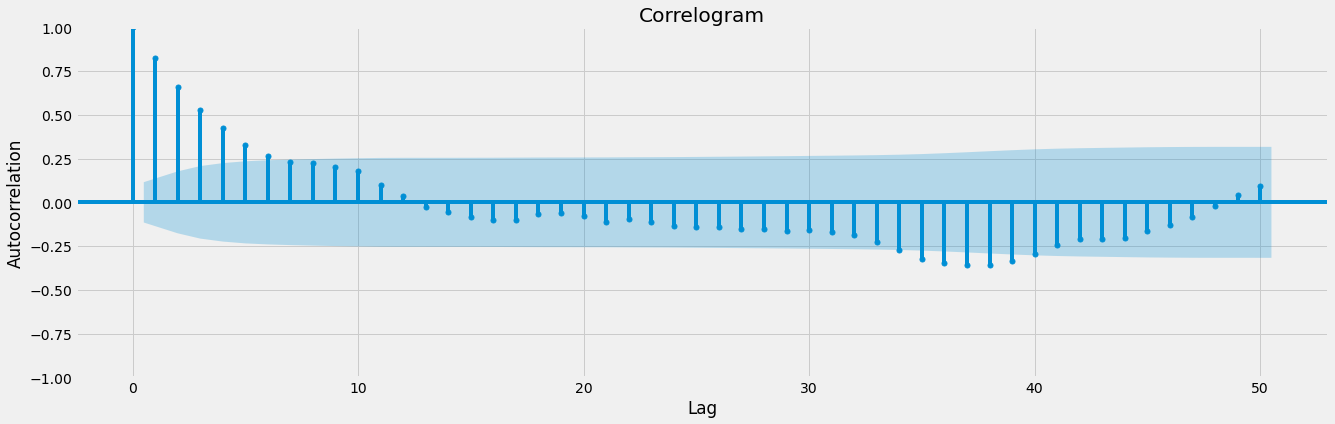

In [26]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(20, 6))
plot_acf(train_data["irregular"], lags=50, ax=ax)

# Set plot labels and title
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Correlogram')

# Show the plot
plt.show()

In [32]:
#df1.to_csv('output.csv', index= True)

In [27]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=15, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [28]:
len(AR1_values)


303

In [29]:
len(AR1_values)
AR1_values
Ar_ax = np.floor(np.linspace(6,308,303))
len(Ar_ax)

303

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2018-01-01,1,10435.55,10491.947149,0.994625,1,1.004976,0.989700,0.989700,9.992662e-01,0.038303,1.010983,0.978948
1,2018-01-02,2,10442.20,10494.776642,0.994990,1,1.004976,0.990063,0.990063,9.970658e-01,0.076549,1.010794,0.979491
2,2018-01-03,3,10443.20,10497.597711,0.994818,1,1.004976,0.989892,0.989892,9.934021e-01,0.114683,1.010591,0.979518
3,2018-01-04,4,10504.80,10500.410357,1.000418,1,1.004976,0.995464,0.995464,9.882804e-01,0.152649,1.010374,0.985243
4,2018-01-05,5,10558.85,10503.214580,1.005297,1,1.004976,1.000319,1.000319,9.817083e-01,0.190391,1.010144,0.990274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2019-02-22,285,10791.65,10957.026234,0.984907,2,0.991968,0.992881,0.992881,-7.654925e-02,-0.997066,1.004719,0.988218
285,2019-02-25,286,10880.10,10957.463523,0.992940,2,0.991968,1.000979,1.000979,-3.830273e-02,-0.999266,1.005112,0.995888
286,2019-02-26,287,10835.30,10957.892389,0.988812,2,0.991968,0.996819,0.996819,-4.286264e-16,-1.000000,1.005499,0.991367
287,2019-02-27,288,10806.65,10958.312831,0.986160,2,0.991968,0.994145,0.994145,3.830273e-02,-0.999266,1.005880,0.988333


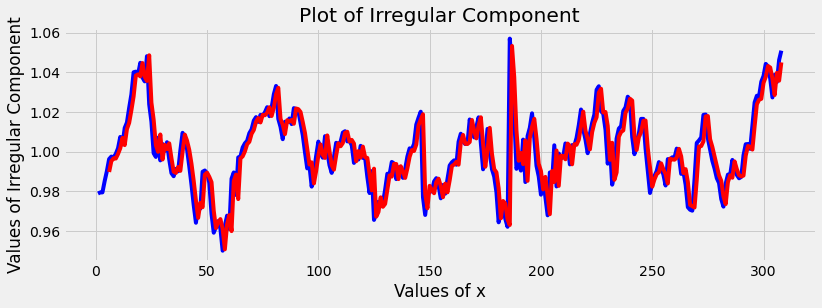

In [30]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(x, irregular, c = "blue")
plt.plot(Ar_ax, AR1_values, c = "red")
display(train_data)

In [104]:
#from statsmodels.tsa.api import SimpleExpSmoothing
#from sklearn.metrics import mean_squared_error

#smoothing_levels = np.linspace(0.1,0.9,100)
#sse_array = []

#best_alpha = None
#best_mse = float('inf')

# Calculate SSE for different smoothing levels
#for level in smoothing_levels:
 #   model = SimpleExpSmoothing(irregular)
 #   fitted_model = model.fit(smoothing_level=level)
 #   fitted_values = fitted_model.fittedvalues
   
 #   sse = ((fitted_values - irregular) ** 2).sum()
 #   sse_array.append(sse)
 #   mse = mean_squared_error(irregular, fitted_values)
 #   if mse < best_mse:
 #       best_alpha = level
 #       best_mse = mse
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
#best_alpha

In [29]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

smoothing_levels = np.linspace(0.1,0.3,100)
sse_array = []

best_alpha = None
best_mse = float('inf')

# Calculate SSE for different smoothing levels
for level in smoothing_levels:
    model = SimpleExpSmoothing(train_data["irregular"])
    fitted_model = model.fit(smoothing_level=level)
    
    predictions = fitted_model.forecast(1)
    mse = (test_data["irregular"].iloc[0] - predictions)**2
    
    if mse.iloc[0] < best_mse:
        best_alpha = level
        best_mse = mse.iloc[0]
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
best_alpha

0.3

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing

final_model_simp_exp = SimpleExpSmoothing(train_data["irregular"])
fitted_model_simp_exp = final_model_simp_exp.fit(smoothing_level = best_alpha)  # Adjust smoothing level as desired

# Obtain the fitted values and forecast for the next period
fitted_values_simp_exp = fitted_model_simp_exp.fittedvalues

# Print the fitted values and forecast
#print("Fitted Values:")
#print(fitted_values)

#sse = ((fitted_values - irregular) ** 2).sum()
#print("SSE:")
#print(sse)
print(fitted_model_simp_exp.summary())
fitted_values_simp_exp

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              irregular   No. Observations:                  289
Model:             SimpleExpSmoothing   SSE                              0.046
Optimized:                       True   AIC                          -2526.166
Trend:                           None   BIC                          -2518.833
Seasonal:                        None   AICC                         -2526.025
Seasonal Periods:                None   Date:                 Mon, 17 Jul 2023
Box-Cox:                        False   Time:                         14:46:19
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
initial_level              0.9841969                

0      0.984197
1      0.982622
2      0.981683
3      0.981033
4      0.982296
         ...   
284    0.984771
285    0.985805
286    0.988830
287    0.989591
288    0.989214
Length: 289, dtype: float64

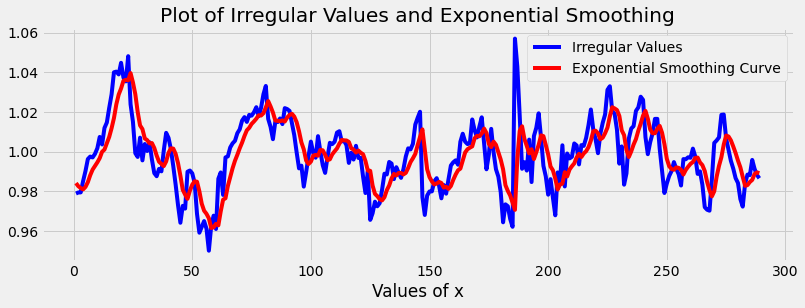

In [32]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
#plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Values and Exponential Smoothing")

plt.plot(train_data["x"], train_data["irregular"], c = "blue", label = "Irregular Values")
plt.plot(train_data["x"], fitted_values_simp_exp, c = "red", label = "Exponential Smoothing Curve")
plt.legend(framealpha=1, frameon=True)

In [33]:
test_predictions = fitted_model_simp_exp.forecast(19)
#mse = mean_squared_error(test_data['irregular'], test_predictions)
#print(mse)
#print(test_predictions)
#fitted_model_simp_exp.fittedvalues.forecast(10)
test_predictions
forecast_simexp = test_predictions

In [34]:
display(train_data)
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2018-01-01,1,10435.55,10491.947149,0.994625,1,1.004976,0.989700,0.989700,9.992662e-01,0.038303,1.010983,0.978948
1,2018-01-02,2,10442.20,10494.776642,0.994990,1,1.004976,0.990063,0.990063,9.970658e-01,0.076549,1.010794,0.979491
2,2018-01-03,3,10443.20,10497.597711,0.994818,1,1.004976,0.989892,0.989892,9.934021e-01,0.114683,1.010591,0.979518
3,2018-01-04,4,10504.80,10500.410357,1.000418,1,1.004976,0.995464,0.995464,9.882804e-01,0.152649,1.010374,0.985243
4,2018-01-05,5,10558.85,10503.214580,1.005297,1,1.004976,1.000319,1.000319,9.817083e-01,0.190391,1.010144,0.990274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2019-02-22,285,10791.65,10957.026234,0.984907,2,0.991968,0.992881,0.992881,-7.654925e-02,-0.997066,1.004719,0.988218
285,2019-02-25,286,10880.10,10957.463523,0.992940,2,0.991968,1.000979,1.000979,-3.830273e-02,-0.999266,1.005112,0.995888
286,2019-02-26,287,10835.30,10957.892389,0.988812,2,0.991968,0.996819,0.996819,-4.286264e-16,-1.000000,1.005499,0.991367
287,2019-02-27,288,10806.65,10958.312831,0.986160,2,0.991968,0.994145,0.994145,3.830273e-02,-0.999266,1.005880,0.988333


,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
289,2019-03-01,290,10863.50,10959.128447,0.991274,3,0.99738,0.993878,0.993878,0.114683,-0.993402,1.006620,0.987342
290,2019-03-05,291,10987.45,10959.523620,1.002548,3,0.99738,1.005181,1.005181,0.152649,-0.988280,1.006978,0.998216
291,2019-03-06,292,11053.00,10959.910369,1.008494,3,0.99738,1.011142,1.011142,0.190391,-0.981708,1.007328,1.003787
292,2019-03-07,293,11058.20,10960.288696,1.008933,3,0.99738,1.011583,1.011583,0.227854,-0.973695,1.007668,1.003885
293,2019-03-08,294,11035.40,10960.658599,1.006819,3,0.99738,1.009463,1.009463,0.264982,-0.964253,1.007999,1.001453
294,2019-03-11,295,11168.05,10961.020079,1.018888,3,0.99738,1.021564,1.021564,0.301721,-0.953396,1.008320,1.013135
295,2019-03-12,296,11301.20,10961.373135,1.031002,3,0.99738,1.033710,1.033710,0.338017,-0.941140,1.008630,1.024865
296,2019-03-13,297,11341.70,10961.717769,1.034664,3,0.99738,1.037382,1.037382,0.373817,-0.927502,1.008929,1.028201
297,2019-03-14,298,11343.25,10962.053979,1.034774,3,0.99738,1.037492,1.037492,0.409069,-0.912504,1.009217,1.028016
298,2019-03-15,299,11426.85,10962.381766,1.042369,3,0.99738,1.045107,1.045107,0.443720,-0.896166,1.009493,1.035279


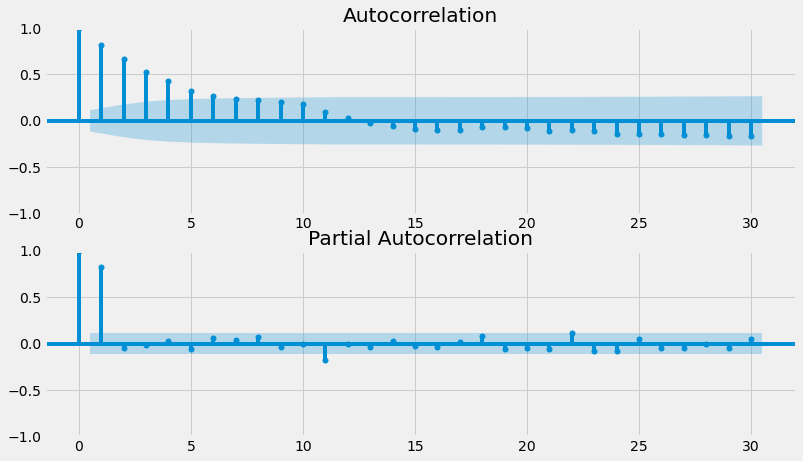

In [35]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7))
sm.graphics.tsa.plot_acf(train_data["irregular"], ax=ax1, lags=30)
sm.graphics.tsa.plot_pacf(train_data["irregular"], ax=ax2, lags=30,  method='ywm')
plt.show()

In [36]:
plt.figure(figsize=(12, 4))

import statsmodels.api as sm
model_arima = sm.tsa.ARIMA(train_data["irregular"], order=(5, 0, 1))  # ARIMA(p, d, q) where d=0 for ARMA model
results_arima = model_arima.fit(method_kwargs={'maxiter': 4000})
fitted_values_arima = results_arima.fittedvalues
#print(fitted_values_arima)

est_residual_train = fitted_values_arima

est_yt_train = train_data["T_t"]*train_data["seasonal_indices"]*train_data["ut_hat"]*est_residual_train
#print(est_residual_train)
#print(est_yt_train)

<Figure size 864x288 with 0 Axes>

In [37]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=4, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [38]:
forecast_start = len(train_data["irregular"])
forecast_end = forecast_start + 18  # Adjust the forecast horizon as needed
forecast = results_arima.predict(start=forecast_start, end=forecast_end)
#print(forecast)

est_residual_test = forecast
est_yt_test = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*est_residual_test
est_yt_test_ar = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*forecast_ar
est_yt_test_simexp = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*forecast_simexp

2      0.979518
3      0.985243
4      0.990274
5      0.996322
6      0.997568
         ...   
284    0.988218
285    0.995888
286    0.991367
287    0.988333
288    0.986636
Name: irregular, Length: 287, dtype: float64


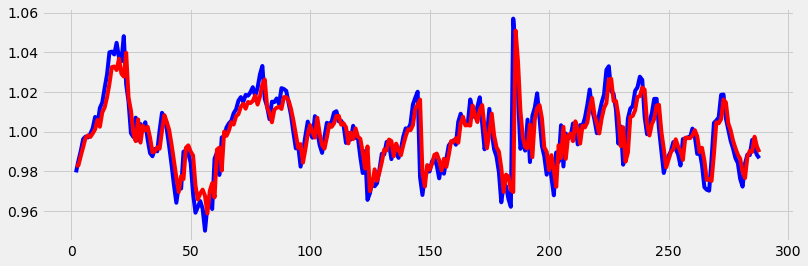

In [39]:
plt.figure(figsize=(12, 4))
plt.plot((train_data["irregular"])[2:], color = "blue")
plt.plot(fitted_values_arima[2:], color = "red")

#plt.plot(fitted_values_arima, color = "red")
print((train_data["irregular"])[2:])

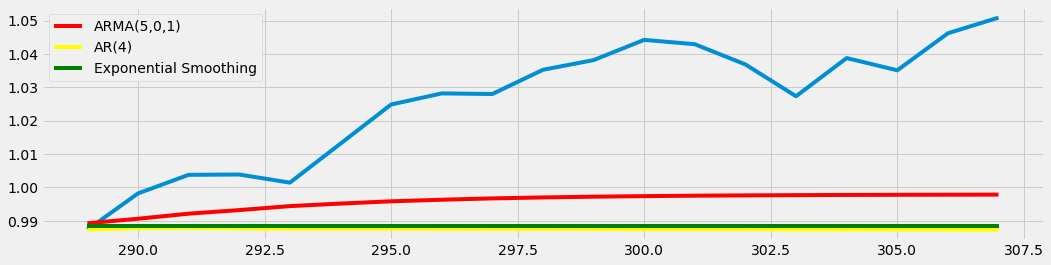

In [42]:
plt.figure(figsize=(16, 4))
plt.plot(test_data["irregular"])
plt.plot(forecast, color = "red", label = "ARMA(5,0,1)")
plt.plot(forecast_ar, color = "yellow", label = "AR(4)")
plt.plot(forecast_simexp, color = "green", label = "Exponential Smoothing")
plt.legend(framealpha=1, frameon=True)

plt.show()

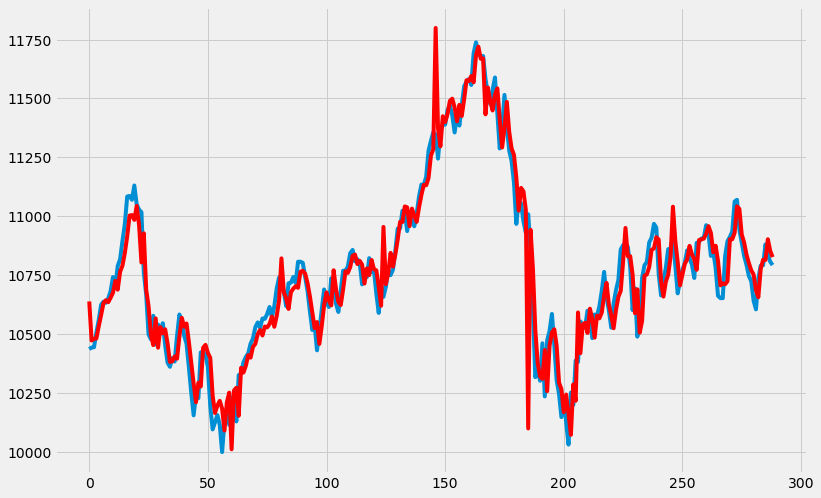

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(train_data["yt_obs"])
plt.plot(est_yt_train, color = "red")
plt.show()

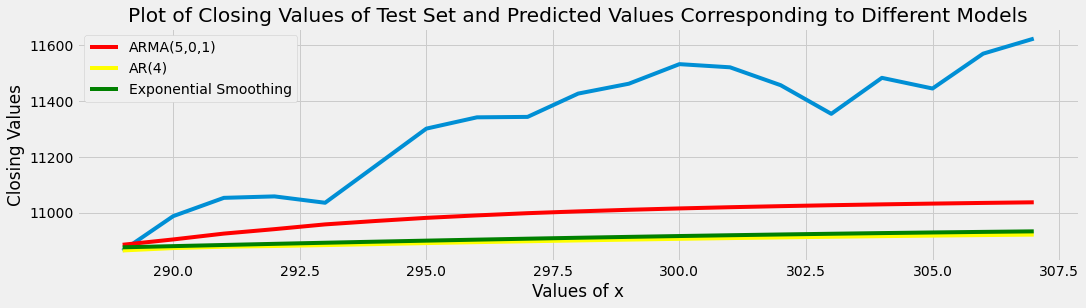

2632459.3358481973
4111060.104165347
3953124.1717269737


In [44]:
plt.figure(figsize=(16, 4))
plt.xlabel("Values of x")
plt.ylabel("Closing Values")
plt.title("Plot of Closing Values of Test Set and Predicted Values Corresponding to Different Models")


plt.plot(test_data["yt_obs"])
plt.plot(est_yt_test, color = "red", label = "ARMA(5,0,1)")
plt.plot(est_yt_test_ar, color = "yellow", label = "AR(4)")
plt.plot(est_yt_test_simexp, color = "green", label = "Exponential Smoothing")

plt.legend(framealpha=1, frameon=True)
plt.show()

test_error_arma = sum(np.square(test_data["yt_obs"] - est_yt_test))
print(test_error_arma)

test_error_ar = sum(np.square(test_data["yt_obs"] - est_yt_test_ar))
print(test_error_ar)

test_error_simexp = sum(np.square(test_data["yt_obs"] - est_yt_test_simexp))
print(test_error_simexp)
